# **Predicción de usuarios del Sofi (BOT) que solicitarán atención humana**

*Juan Esteban Ramírez Duran*

----


## Descripción del Problema

El Bot de la Universidad ICESI es una herramienta de soporte automatizada diseñada para reducir la cantidad de consultas que requieren la intervención de un agente humano. Su objetivo es proporcionar respuestas rápidas y eficientes a preguntas frecuentes de estudiantes, docentes y personal administrativo. Sin embargo, no todas las consultas pueden resolverse a través del bot, y un porcentaje de usuarios termina solicitando asistencia humana, lo que genera carga adicional en los agentes de soporte.

Actualmente, no se cuenta con un mecanismo que permita predecir cuántos usuarios requerirán atención humana, lo que puede ocasionar falta de personal disponible en momentos de alta demanda o ineficiencia en la asignación de recursos cuando hay menos consultas de lo esperado. Esto impacta negativamente en los tiempos de respuesta, la experiencia del usuario y la efectividad del bot como herramienta de soporte.

## Justificación del Uso de Ciencia de Datos o IA

El uso de Ciencia de Datos e Inteligencia Artificial (IA) permitirá analizar datos históricos de interacciones con el bot y detectar patrones que indiquen la probabilidad de que un usuario solicite la ayuda de un agente humano. Con esta información, la universidad podrá optimizar la disponibilidad de los agentes, mejorar la capacidad de respuesta y hacer ajustes en el bot para reducir la cantidad de consultas escaladas a atención humana.

Algunas metodologías adecuadas para este análisis incluyen:

**1. Regresión Logística:** Permite predecir la probabilidad de que un usuario solicite la ayuda de un agente en función de sus interacciones con el bot.

**2. Clasificación con Machine Learning (Random Forest, SVM)**: Modelos supervisados que pueden identificar patrones en las interacciones que conducen a una solicitud de atención humana.

##  Formulación de una Pregunta SMART

¿Cuántos usuarios que interactúan con el Bot de la Universidad ICESI solicitarán ser atendidos por un agente en los próximos 30 días, considerando datos históricos de interacciones y características de la conversación?


✅ Específica: Se enfoca en predecir cuántos usuarios solicitarán atención humana después de interactuar con el bot.

✅ Medible: Se basa en datos cuantificables de interacciones previas y solicitudes de atención.

✅ Accionable: Permite ajustar la cantidad de agentes disponibles, mejorar la eficiencia del bot y reducir consultas escaladas innecesariamente.

✅ Realista: Utiliza datos históricos reales de consultas al bot, lo que hace factible su implementación.

✅ Temporal: Se establece un horizonte de 30 días, facilitando la planificación operativa.

In [22]:
import pandas as pd

file_url = 'https://github.com/jeramirez169/An-lisis-exploratorio-de-datos/raw/main/SofiDataset.xlsx'

In [23]:
df = pd.read_excel(file_url)
print(df.shape)

(107991, 25)


In [24]:
# The column name might be 'Id' instead of 'ID'
df = df.drop_duplicates(subset=['Id'])
df.shape

(35133, 25)

In [25]:
#Agregar columna del tipo de resolución (Por un agente o por el chat)
df['Tipo de resolución'] = df.apply(lambda row: "Chat" if row['Resolución'] == "Solo AgentBot" else "Agente", axis=1)

#Agregar columna del mes
df['Mes'] = pd.to_datetime(df['Fecha']).dt.month

#Quitar columna fecha
df = df.drop(columns=['Fecha'])




Tipo de resolución
Chat      24107
Agente    11026
Name: count, dtype: int64
Tipo de resolución
Chat      0.686164
Agente    0.313836
Name: count, dtype: float64


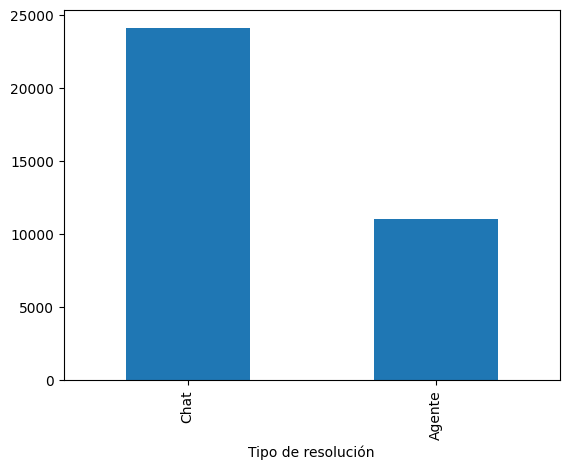

In [26]:
# Calcula la frecuencia de cada categoría
tipo_resolucion_counts = df['Tipo de resolución'].value_counts()
print(tipo_resolucion_counts)

# Visualiza la distribución con un gráfico de barras
tipo_resolucion_counts.plot(kind='bar')

# Calcula la proporción de cada categoría
tipo_resolucion_proportions = tipo_resolucion_counts / len(df)
print(tipo_resolucion_proportions)